#                                 CUSTOMER CHURN PREDICTION


In [1]:
#pip install imblearn

In [2]:
#pip install sklearn

In [3]:
#conda list scikit-learn

In [4]:
#pip install cython

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
tel_data=pd.read_csv("Telco-churn.csv")

In [10]:
tel_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


_Reading the csv data file_

In [11]:
tel_data.shape

(7043, 21)

_This code is for taking total number of rows and total number of columns in the dataset._

In [12]:
tel_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


_Taking first 5 rows from the dataset for analysis._

In [13]:
tel_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


_This is for taking last 5 rows for analysis._

In [14]:
tel_data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

_To get the columns of the dataset._

In [15]:
tel_data["Churn"].unique()

array(['No', 'Yes'], dtype=object)

_This method gives the unique values that are present in that row._

In [16]:
tel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
tel_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


_This method gives the information about the dataset i.e total number of rows , total number of null or not-null values and the datatype of that perticular column._

In [18]:
tel_data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

_This gives how many such type of elements are present in that perticular column._

Text(0.5, 1.0, 'Output Variable per Catogory')

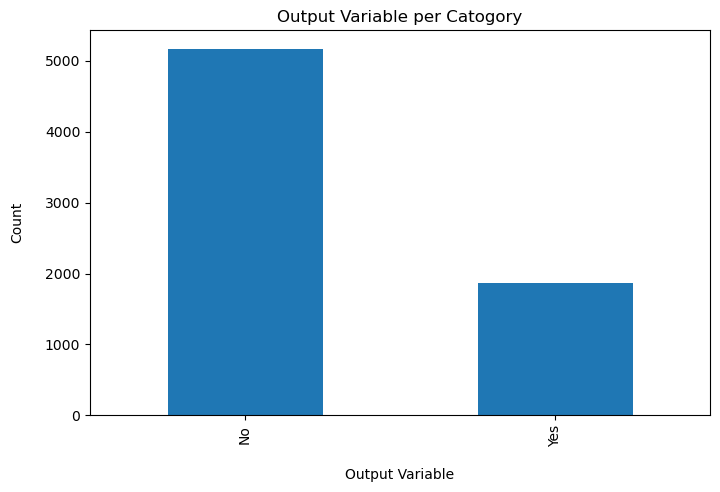

In [19]:
tel_data['Churn'].value_counts().plot(kind='bar', figsize=(8,5))
plt.xlabel('Output Variable' , labelpad=15)
plt.ylabel("Count" , labelpad=15)
plt.title("Output Variable per Catogory" )

_From this we can analyze the target column._

In [20]:
(tel_data['Churn'].value_counts()/len(tel_data['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

_Here we can see that the dataset is not fully balanced i.e the ratio is 73:27 thats why we are considering or analyzing other features of the dataset._

In [21]:
# missing_values = pd.DataFrame((tel_data.isnull().sum())*100/tel_data.shape[0]).reset_index()
# plt.figure(figsize=(18,9))
# ax = sns.pointplot('index',0,data=missing_values)
# plt.xticks(rotation =90,fontsize =11)
# plt.title("Percentage of Missing values")
# plt.ylabel("PERCENTAGE")

# plt.show()

_This gives the total analysis of how many null values are present in the dataset._

## DATA CLEANING

_First we have to copy the dataset to another variable._

In [22]:
tel_daf=tel_data.copy()

In [23]:
tel_daf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
tel_daf.TotalCharges = pd.to_numeric(tel_daf.TotalCharges, errors='coerce')
tel_daf.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

_Here first we are converting the column TotalCharges to numeric values and setting errors as coerce means if we set errors as coerce, it will force the column to float and problem values to NaN.Then finding the total number of NaN values in the columns of the dataset._

In [25]:
tel_daf.loc[tel_daf ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


_from this we can see those rows and columns that have NaN values._

_here we are converting the customers to range of values on the basis of their tenure._

In [26]:
tel_daf['tenure'].max()

72

In [27]:
lab = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

tel_daf['tenure_group'] = pd.cut(tel_daf.tenure, range(1, 80, 12), right=False, labels=lab)

In [28]:
tel_daf['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [29]:
tel_daf.drop(columns=['customerID','tenure'], axis=1,inplace=True)

_In this dataset there are two columns which are not usable for the furthur processing and analysis so we remove those columns from the dataset._

In [30]:
tel_daf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


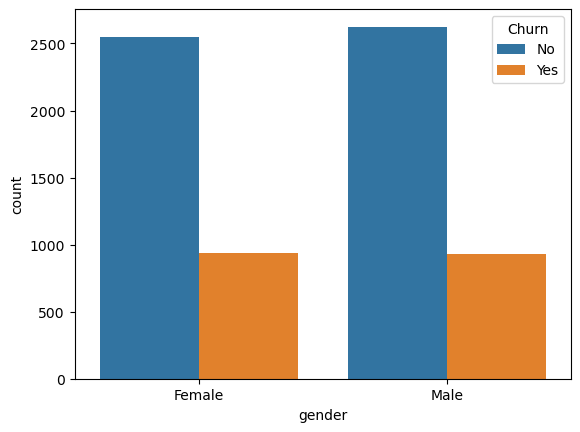

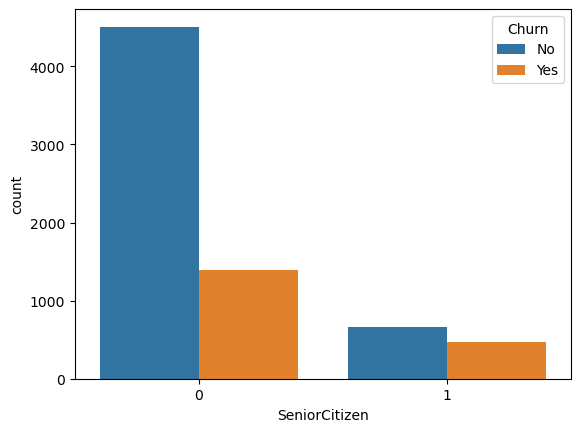

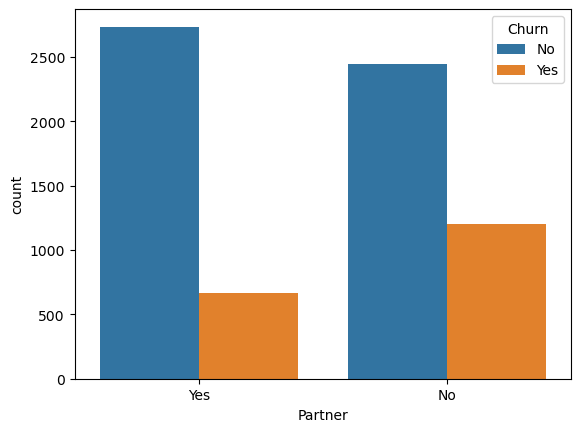

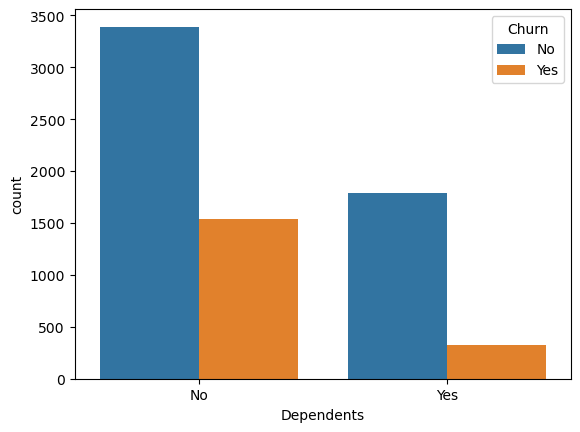

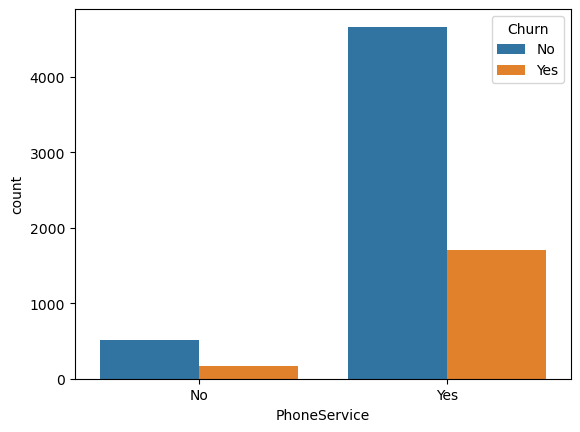

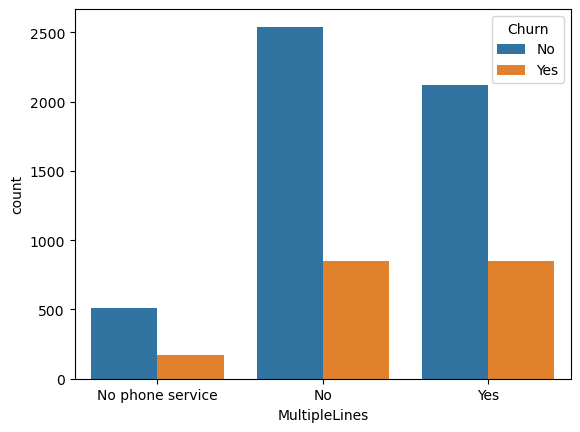

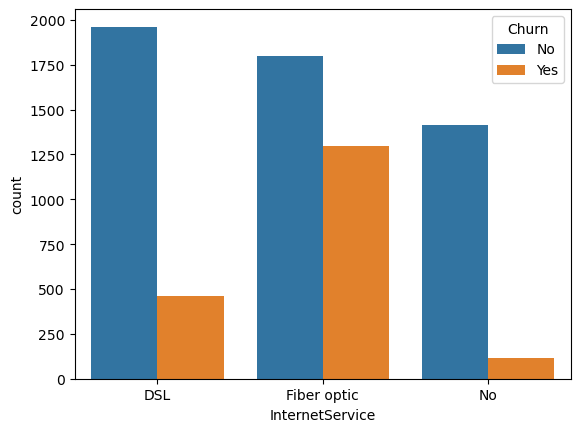

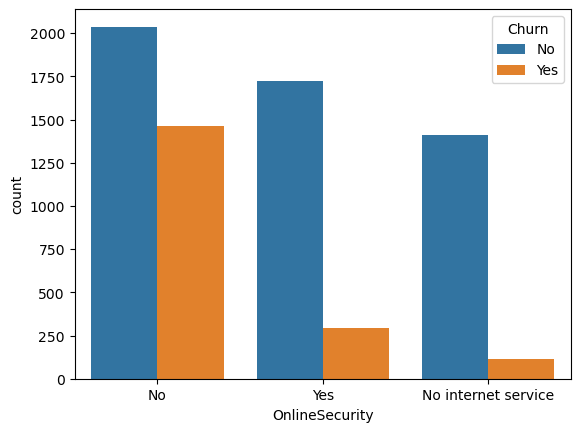

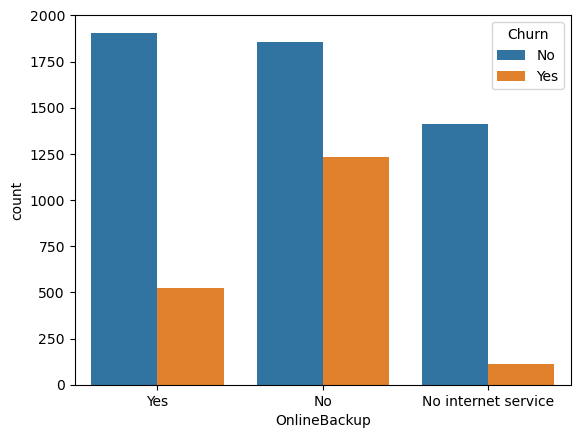

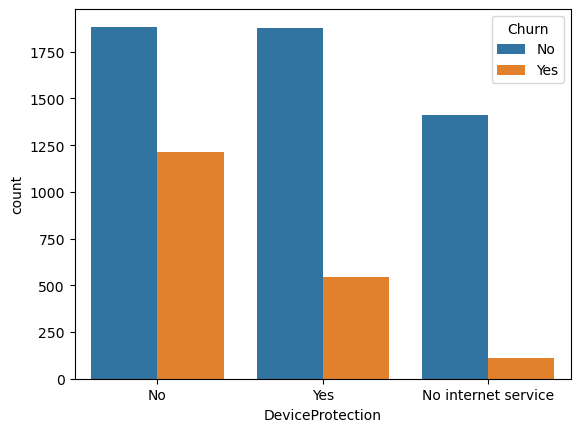

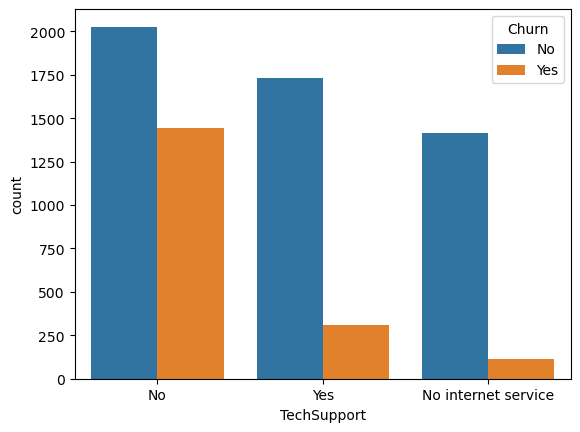

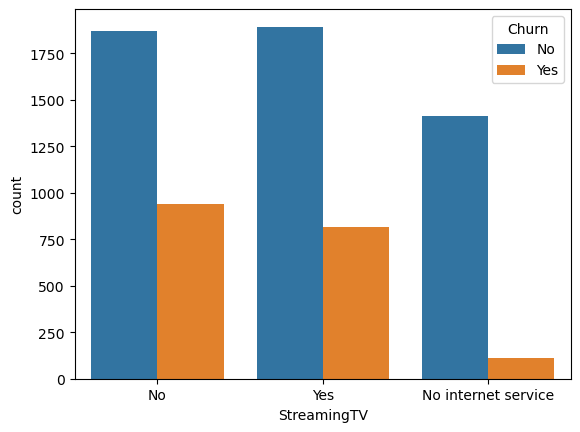

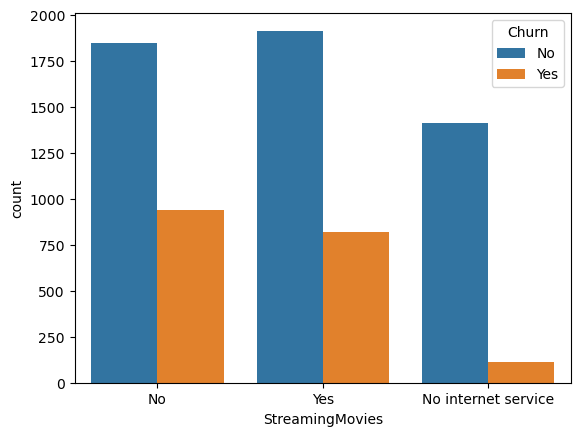

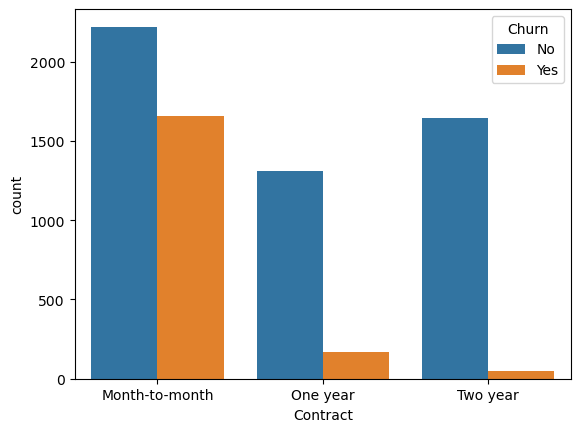

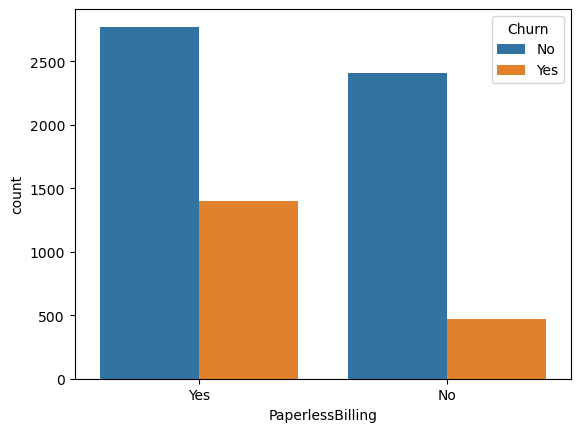

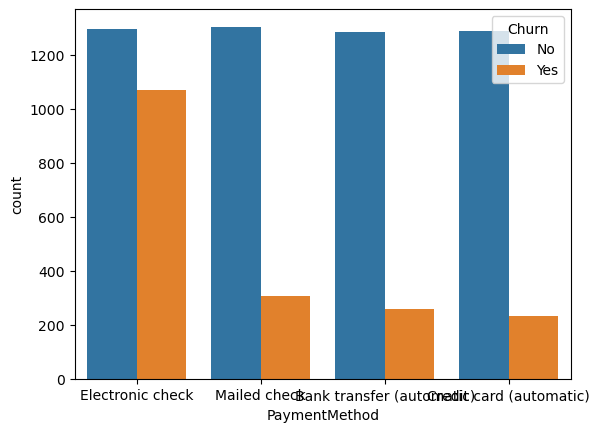

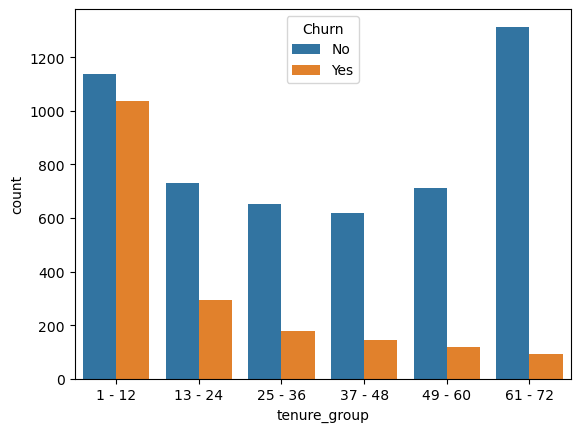

In [31]:
for i, predictor in enumerate(tel_daf.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=tel_daf, x=predictor, hue='Churn')

_Here we are plotting the graph between churn and all other columns of the dataset to predict and analysis._

In [32]:
tel_daf['Churn'] = np.where(tel_daf.Churn == 'Yes',1,0)

In [33]:
tel_daf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


_Here we are converting the churn column to numeric values._


In [34]:
tel_daf_dummy=pd.get_dummies(tel_daf)
tel_daf_dummy

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


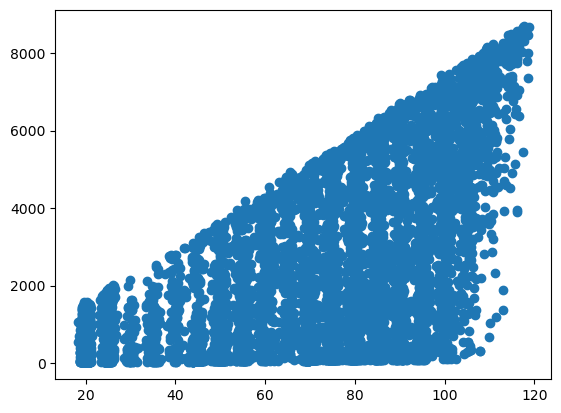

In [35]:
plt.scatter(tel_daf_dummy['MonthlyCharges'],tel_daf_dummy['TotalCharges'])
plt.show()

_So here we can see that the total charges increases as the monthly charges increases. This conclusion is derived from the plot called scatter plot._

C:\Users\hp\AppData\Local\Temp\ipykernel_11360\2898529678.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_daf_dummy.MonthlyCharges[(tel_daf_dummy["Churn"] == 0) ],
C:\Users\hp\AppData\Local\Temp\ipykernel_11360\2898529678.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_daf_dummy.MonthlyCharges[(tel_daf_dummy["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

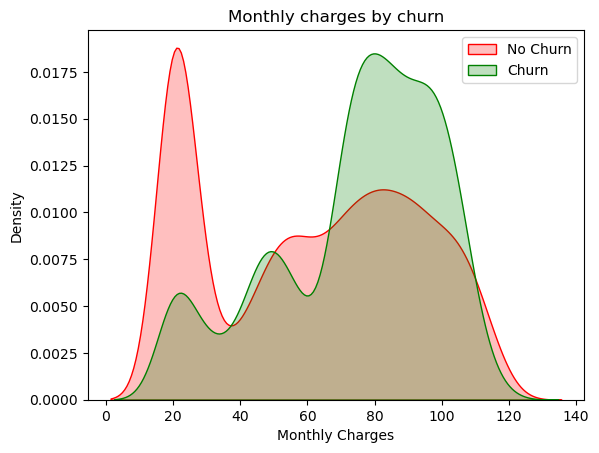

In [36]:
Mth = sns.kdeplot(tel_daf_dummy.MonthlyCharges[(tel_daf_dummy["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(tel_daf_dummy.MonthlyCharges[(tel_daf_dummy["Churn"] == 1) ],
                ax =Mth, color="green", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

_This is the kernel density estimate graph , it allows us to estimate probabilty density function and we can easily visualize the dataset from this graph._

C:\Users\hp\AppData\Local\Temp\ipykernel_11360\3285344409.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_daf_dummy.TotalCharges[(tel_daf_dummy["Churn"] == 0) ],
C:\Users\hp\AppData\Local\Temp\ipykernel_11360\3285344409.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(tel_daf_dummy.TotalCharges[(tel_daf_dummy["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

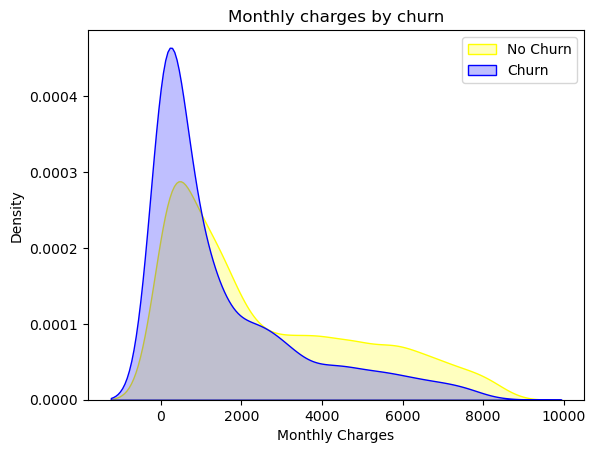

In [37]:
Mth = sns.kdeplot(tel_daf_dummy.TotalCharges[(tel_daf_dummy["Churn"] == 0) ],
                color="yellow", shade = True)
Mth = sns.kdeplot(tel_daf_dummy.TotalCharges[(tel_daf_dummy["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

In [205]:
tel_daf_dummy.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
SeniorCitizen,1.000000,0.220173,0.102411,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,...,-0.016159,-0.024135,0.171718,-0.153477,-0.027239,0.002144,0.027562,-0.000689,0.014434,-0.002062
MonthlyCharges,0.220173,1.000000,0.651065,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,...,0.042812,0.030550,0.271625,-0.377437,-0.190827,-0.046670,0.009899,0.018019,0.070420,0.185840
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.150889,0.193356,-0.199484,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,-0.164221,...,-0.117937,-0.134302,0.301919,-0.091683,0.320054,0.020308,-0.040637,-0.059229,-0.100416,-0.225500
gender_Female,0.001874,0.014569,-0.000048,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,...,0.016024,-0.001215,-0.000752,-0.013744,0.001134,0.000701,-0.006196,0.020684,0.004362,-0.016199
gender_Male,-0.001874,-0.014569,0.000048,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,0.010517,...,-0.016024,0.001215,0.000752,0.013744,-0.001134,-0.000701,0.006196,-0.020684,-0.004362,0.016199
Partner_No,-0.016479,-0.096848,-0.319072,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,-0.452676,...,-0.110706,-0.082029,0.083852,0.095125,0.305407,0.048868,-0.002744,-0.034694,-0.104860,-0.279545
Partner_Yes,0.016479,0.096848,0.319072,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,0.452676,...,0.110706,0.082029,-0.083852,-0.095125,-0.305407,-0.048868,0.002744,0.034694,0.104860,0.279545
Dependents_No,0.211185,0.113890,-0.064653,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,-1.000000,...,-0.052021,-0.060267,0.150642,-0.059071,0.146661,0.002443,-0.008396,-0.022665,-0.030483,-0.116656
Dependents_Yes,-0.211185,-0.113890,0.064653,-0.164221,-0.010517,0.010517,-0.452676,0.452676,-1.000000,1.000000,...,0.052021,0.060267,-0.150642,0.059071,-0.146661,-0.002443,0.008396,0.022665,0.030483,0.116656


<AxesSubplot:>

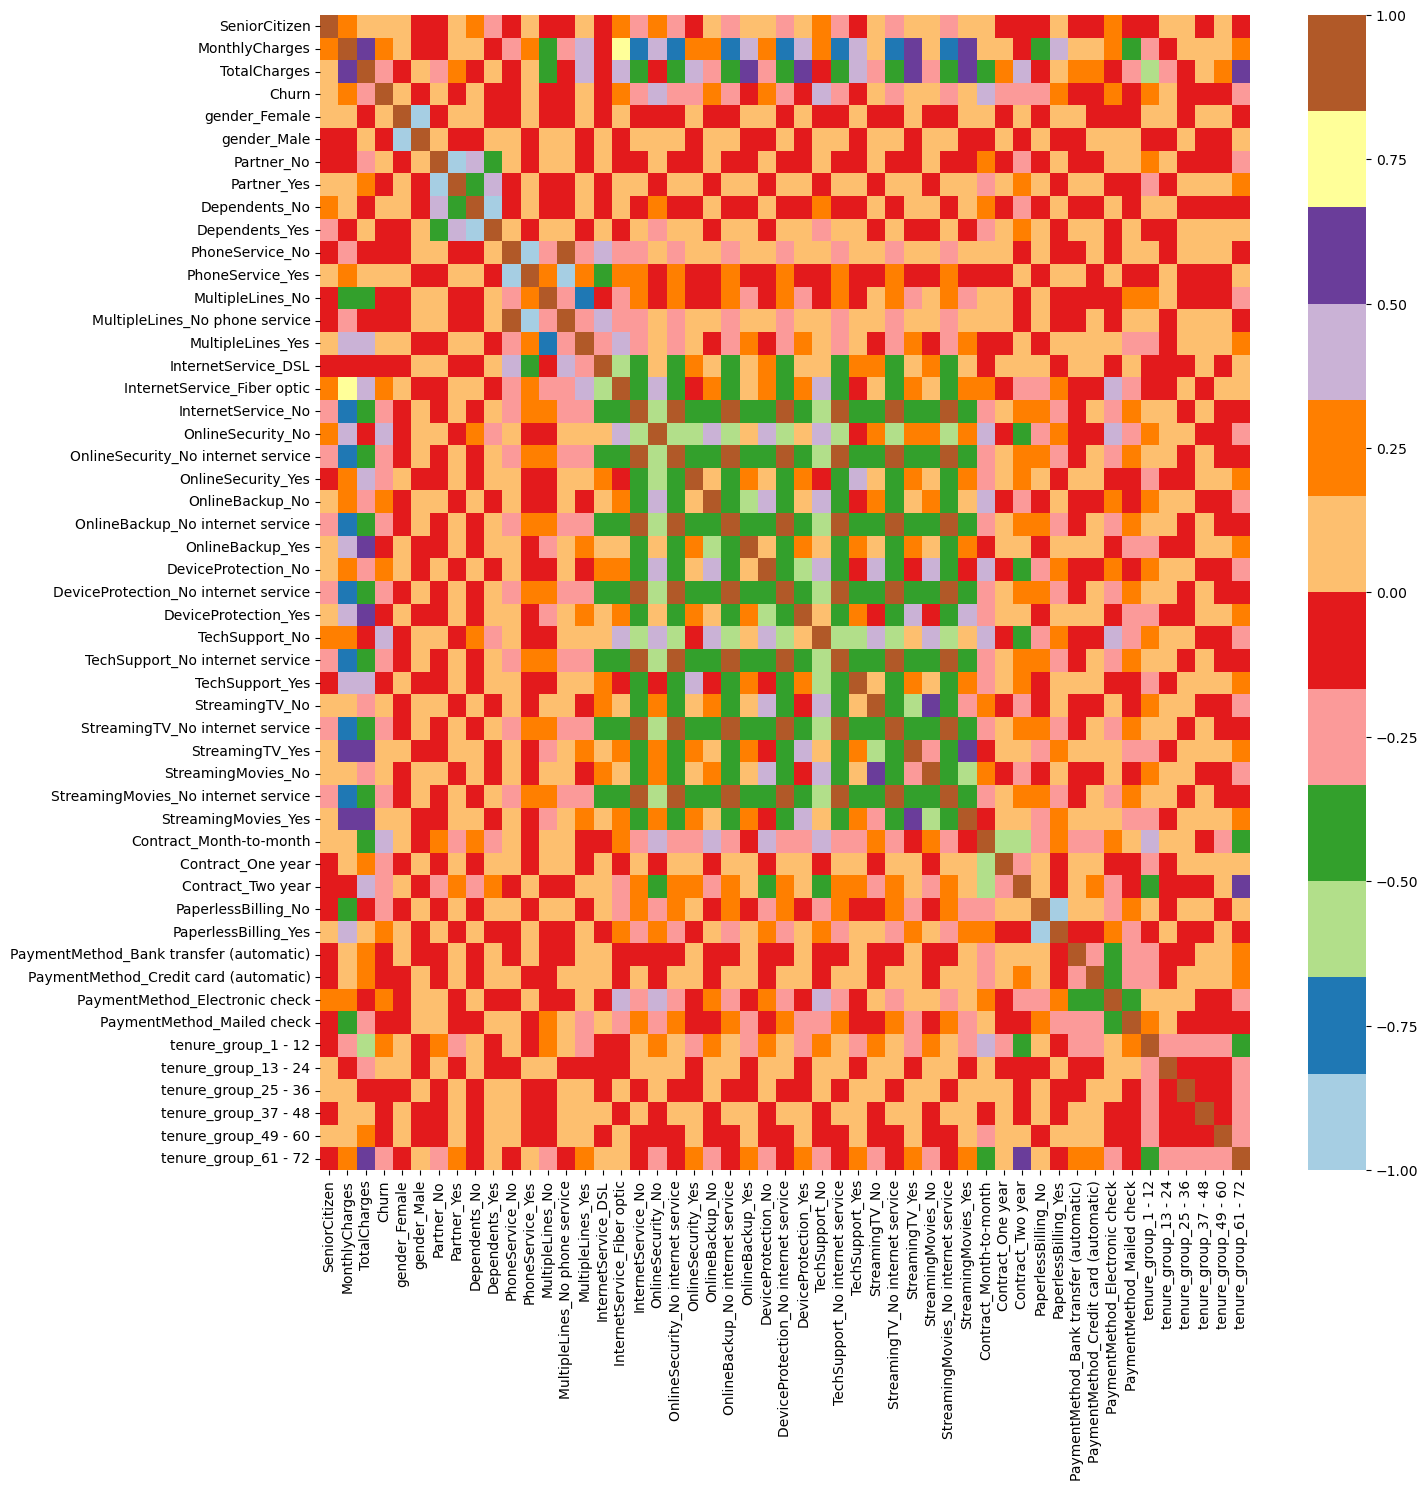

In [206]:
plt.figure(figsize=(15,15))
sns.heatmap(tel_daf_dummy.corr(),cmap='Paired')

In [207]:
tel_daf_dummy.to_csv('tel_churn.csv')

## Model building part

In [208]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from imblearn.combine import SMOTEENN 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


_importing all the required modules._

In [209]:
df=pd.read_csv('tel_churn.csv')

In [210]:
df

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,84.80,1990.50,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,7039,0,103.20,7362.90,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,7040,0,29.60,346.45,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7041,7041,1,74.40,306.60,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [211]:
df=df.drop('Unnamed: 0' , axis=1)

_droping the unnecessary columns from the dataset._

In [212]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7043 non-null   int64  
 4   gender_Female                            7043 non-null   int64  
 5   gender_Male                              7043 non-null   int64  
 6   Partner_No                               7043 non-null   int64  
 7   Partner_Yes                              7043 non-null   int64  
 8   Dependents_No                            7043 non-null   int64  
 9   Dependents_Yes                           7043 non-null   int64  
 10  PhoneService_No                          7043 no

In [214]:
df.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [215]:
cols=['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
       'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72']

In [216]:
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   SeniorCitizen                            7043 non-null   int64
 1   MonthlyCharges                           7043 non-null   int64
 2   TotalCharges                             7043 non-null   int64
 3   Churn                                    7043 non-null   int64
 4   gender_Female                            7043 non-null   int64
 5   gender_Male                              7043 non-null   int64
 6   Partner_No                               7043 non-null   int64
 7   Partner_Yes                              7043 non-null   int64
 8   Dependents_No                            7043 non-null   int64
 9   Dependents_Yes                           7043 non-null   int64
 10  PhoneService_No                          7043 non-null   int64
 11  Phon

In [218]:
x=df.drop('Churn', axis=1)

In [219]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,142,74,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,498,3624,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,436,536,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,266,3570,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,729,674,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,991,3700,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,1340,6304,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,137,1265,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,795,1157,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [220]:
y=df['Churn']

In [221]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

_Here we are initializing the dataset without churn column to x variable and the churn column to y variable._

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

_splitting the data into train and test data for prediction and modelling._

## Decision Tree

In [223]:
p_test = x_test

In [224]:
model=DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8)

In [225]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [226]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [227]:
model.score(x_test,y_test)

0.7792760823278921

In [228]:
x_test

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
5877,0,1414,5743,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1035,0,94,3412,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4874,0,973,4492,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4047,0,1180,5810,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4759,0,879,377,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,0,1269,6283,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3240,0,1406,5734,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
807,0,1442,6367,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3564,0,1102,5761,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [229]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1052
           1       0.58      0.46      0.51       357

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



_As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers._


In [230]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [231]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)

In [232]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [233]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9302127659574468
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       548
           1       0.92      0.95      0.94       627

    accuracy                           0.93      1175
   macro avg       0.93      0.93      0.93      1175
weighted avg       0.93      0.93      0.93      1175



In [234]:
print(metrics.confusion_matrix(y_test, y_pred))

[[934 118]
 [193 164]]


## RANDOM FOREST

In [235]:
from sklearn.ensemble import RandomForestClassifier


In [236]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [237]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [238]:
y_pred=model_rf.predict(x_test)

In [239]:
model_rf.score(x_test,y_test)

0.7892122072391767

In [240]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1052
           1       0.61      0.47      0.53       357

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [241]:
sm = SMOTEENN()
x_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [242]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(x_resampled1, y_resampled1,test_size=0.2)

In [243]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [244]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [245]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [246]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [247]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9290598290598291
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       559
           1       0.91      0.95      0.93       611

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



In [248]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[504  55]
 [ 28 583]]


## PCA

In [249]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [250]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [251]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [252]:
yr_predict_pca = model.predict(xr_test_pca)

In [253]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [254]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.729059829059829
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       559
           1       0.74      0.75      0.74       611

    accuracy                           0.73      1170
   macro avg       0.73      0.73      0.73      1170
weighted avg       0.73      0.73      0.73      1170



In [255]:
sm = SMOTEENN()
x_resampled2, y_resampled2 = sm.fit_resample(x,y)

In [256]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(x_resampled2, y_resampled2,test_size=0.2)

In [257]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [258]:
model_rf_smote.fit(xr_train2,yr_train2)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [259]:
yr_predict2 = model_rf_smote.predict(xr_test2)

In [260]:
model_score_r2 = model_rf_smote.score(xr_test2, yr_test2)

In [261]:
print(model_score_r2)
print(metrics.classification_report(yr_test2, yr_predict2))

0.9202772963604853
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       549
           1       0.91      0.95      0.93       605

    accuracy                           0.92      1154
   macro avg       0.92      0.92      0.92      1154
weighted avg       0.92      0.92      0.92      1154



## OPTIMIZATION METHOD

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [263]:
acc = []
for k in range(1, 39, 2):
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(x_train, y_train)
    y_predi = model.predict(x_test)
    acc.append(accuracy_score(y_test, y_predi))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

maximum accuracy = 0.7764371894960965 at k = 27


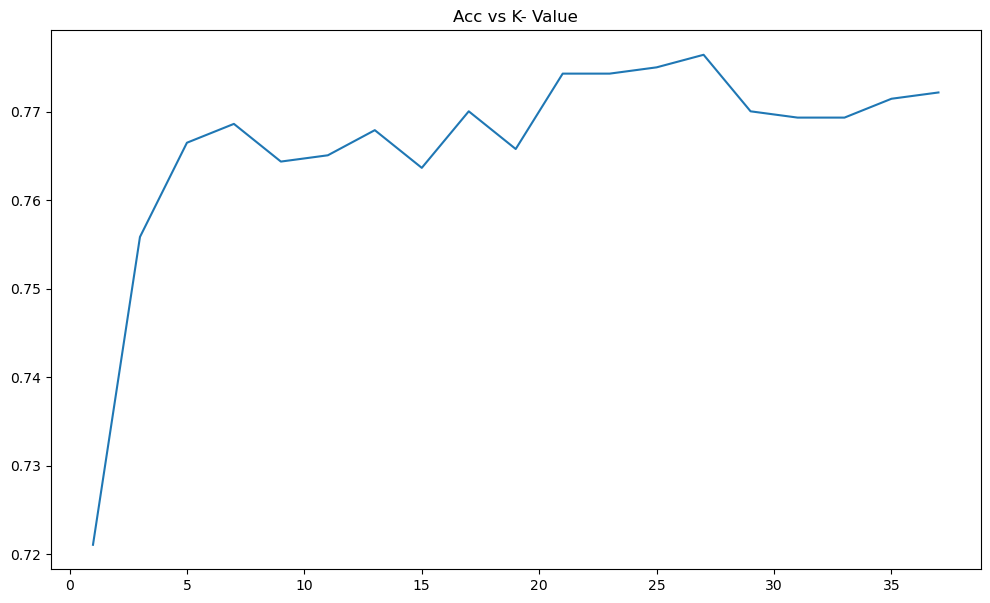

In [264]:
plt.figure(figsize = (12, 7))
plt.plot(range(1, 39, 2), acc)
plt.title("Acc vs K- Value")
print(f"maximum accuracy = {max(acc)} at k = {(np.array(acc).argmax())*2 + 1}")
plt.show()

In [265]:
x5 = df["TotalCharges"]
y5 = df["Churn"]

In [266]:
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.20)

In [267]:
p_test = x5_test

In [268]:
from sklearn.preprocessing import PolynomialFeatures

In [269]:
ploy = PolynomialFeatures(4)

In [270]:
x5_train = np.array(x5_train).reshape(-1, 1)
x5_test = np.array(x5_test).reshape(-1, 1)

In [271]:
ploy.fit(x5_train)

PolynomialFeatures(degree=4)

In [272]:
x5_train = ploy.transform(x5_train)
x5_test = ploy.transform(x5_test)

In [273]:
x5_train

array([[1.00000000e+00, 6.11800000e+03, 3.74299240e+07, 2.28996275e+11,
        1.40099921e+15],
       [1.00000000e+00, 3.39900000e+03, 1.15532010e+07, 3.92693302e+10,
        1.33476453e+14],
       [1.00000000e+00, 6.17800000e+03, 3.81676840e+07, 2.35799952e+11,
        1.45677210e+15],
       ...,
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05],
       [1.00000000e+00, 6.50500000e+03, 4.23150250e+07, 2.75259238e+11,
        1.79056134e+15],
       [1.00000000e+00, 6.15800000e+03, 3.79209640e+07, 2.33517296e+11,
        1.43799951e+15]])

In [274]:
x5_test

array([[1.00000000e+00, 4.28700000e+03, 1.83783690e+07, 7.87880679e+10,
        3.37764447e+14],
       [1.00000000e+00, 2.85600000e+03, 8.15673600e+06, 2.32956380e+10,
        6.65323422e+13],
       [1.00000000e+00, 2.01900000e+03, 4.07636100e+06, 8.23017286e+09,
        1.66167190e+13],
       ...,
       [1.00000000e+00, 5.16000000e+03, 2.66256000e+07, 1.37388096e+11,
        7.08922575e+14],
       [1.00000000e+00, 2.62200000e+03, 6.87488400e+06, 1.80259458e+10,
        4.72640300e+13],
       [1.00000000e+00, 5.83600000e+03, 3.40588960e+07, 1.98767717e+11,
        1.16000840e+15]])

In [275]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()

In [276]:
model = lg.fit(x5_train,y5_train)

In [277]:
y5_predict = model.predict(x5_test)

In [278]:
model.coef_

array([ 0.00000000e+00, -2.11093358e-04,  2.98214775e-08,  3.63401118e-12,
       -7.71614586e-16])

In [279]:
model.intercept_

0.5476101053948942

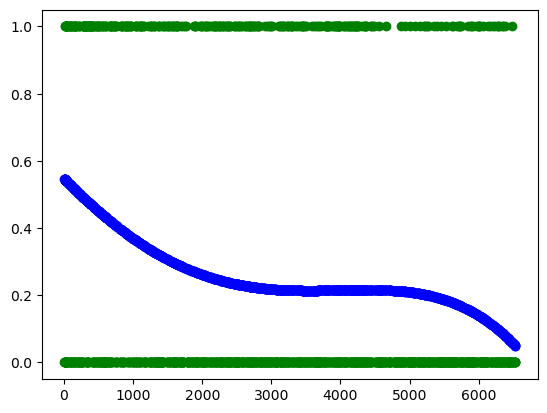

In [280]:
plt.scatter(x5_test[:, 1], y5_predict, c = "b")
plt.scatter(x5_test[:, 1], y5_test, c = "g")
plt.show()

In [281]:
y5_predict

array([0.21641574, 0.22129268, 0.26006256, ..., 0.20463799, 0.22817939,
       0.15860058])

In [282]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [283]:
mean_absolute_error(y5_test,y5_predict)

0.3652273955484179

In [284]:
mean_squared_error(y5_test,y5_predict)

0.18275992786511655

In [285]:
r2_score(y5_test, y5_predict)

0.051212004916173615

In [286]:
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,142,74,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,498,3624,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,436,536,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,266,3570,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,729,674,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,991,3700,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,1340,6304,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,137,1265,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,795,1157,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [287]:
tel_daf

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


In [288]:
tel_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [289]:
tel_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [290]:
cols1=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [291]:
tel_data.set_index(cols1)

,,,,,,,,,,,,,,,,,,,,
customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
